# The Effect of Change of Link Weight
In this notebook, we will consider the effect of change of the weight of a link a in network on the eigenvalues of the
outer connection matrix $ \Xi $. The network considered here is
$$
\dot{x}_i = f(x)_i - \epsilon \sum_{j = 1}^n \xi_{ij} P x_j \quad i = 1, 2, \ldots,n
$$
Here $ \Xi = [\xi_{ij}] $ is the outer connection matrix. Since the network is connected, $ \Xi $ has eigenvalues $ 0 =
\lambda_1 < \lambda_2 \leq \lambda_3 \leq \ldots \leq \lambda_n $. As an example, consider following network.

Load the packages

In [1]:
using LightGraphs
using GraphPlot

Construct the network

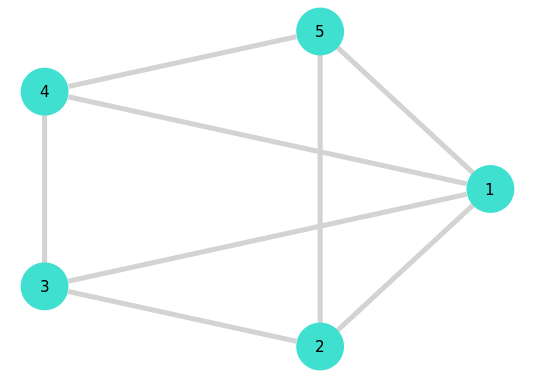

In [2]:
n = 5   # Number of nodes in the network
graph = cycle_graph(n)
add_edge!(graph, 1, 3)
add_edge!(graph, 1, 4)
add_edge!(graph, 2, 5)
gplot(graph, nodelabel=1:nv(graph), layout = circular_layout)

The outer connection matrix of the network is

In [3]:
W = collect(laplacian_matrix(graph)) .|> float

5×5 Matrix{Float64}:
  4.0  -1.0  -1.0  -1.0  -1.0
 -1.0   3.0  -1.0   0.0  -1.0
 -1.0  -1.0   3.0  -1.0   0.0
 -1.0   0.0  -1.0   3.0  -1.0
 -1.0  -1.0   0.0  -1.0   3.0

Let us rescale the matrix such elements on the main diagonal are 1.

In [4]:
function scale(W0)
    W = copy(W0)
    for i in 1 : size(W, 1)
        W[i, :] ./=  W[i, i]
    end
    W
end
Ξ =  scale(W)

5×5 Matrix{Float64}:
  1.0       -0.25      -0.25      -0.25      -0.25
 -0.333333   1.0       -0.333333   0.0       -0.333333
 -0.333333  -0.333333   1.0       -0.333333   0.0
 -0.333333   0.0       -0.333333   1.0       -0.333333
 -0.333333  -0.333333   0.0       -0.333333   1.0

Note that the network has a symmetry corresponding to the permutation matrix.

In [5]:
Q = [
    1 0 0 0 0;
    0 0 0 0 1;
    0 0 0 1 0;
    0 0 1 0 0;
    0 1 0 0 0
]

5×5 Matrix{Int64}:
 1  0  0  0  0
 0  0  0  0  1
 0  0  0  1  0
 0  0  1  0  0
 0  1  0  0  0

 Let $ M^{-1} Q M = Q^\prime $ be eigendecomposiion of $ Q $. Then $ M $ can be found as

In [6]:
using LinearAlgebra
M = eigvecs(Q)

5×5 Matrix{Float64}:
  0.0        0.0       0.0       1.0  0.0
  0.0       -0.707107  0.0       0.0  0.707107
  0.707107   0.0       0.707107  0.0  0.0
 -0.707107   0.0       0.707107  0.0  0.0
  0.0        0.707107  0.0       0.0  0.707107

Using $ M $, $ \Xi $ can be transformed as

In [7]:
G = inv(M) * Q * M

5×5 Matrix{Float64}:
 -1.0           0.0          -2.78178e-16  0.0   0.0
  0.0          -1.0           0.0          0.0  -3.13396e-16
 -3.13396e-16   0.0           1.0          0.0   0.0
  0.0           0.0           0.0          1.0   0.0
  0.0          -2.78178e-16   0.0          0.0   1.0

which is a block diagonal matrix in the form of
$$
G =
\begin{bmatrix}
B & 0 \\
0 & D \\
\end{bmatrix}
$$
Then, we have

In [8]:
B = Q[1 : 2, 1 : 2]

2×2 Matrix{Int64}:
 1  0
 0  0

In [9]:
D = Q[3 : 5, 3 : 5]

3×3 Matrix{Int64}:
 0  1  0
 1  0  0
 0  0  0

The eigenvalues of $ B $ and $ D $ are,

In [10]:
λB =  eigvals(B)

2-element Vector{Float64}:
 0.0
 1.0

-

In [11]:
λD = eigvals(D)

3-element Vector{Float64}:
 -1.0
  0.0
  1.0

Since $ 0 $ is the eigenvalue of $ D $, the subspace corresponding to $ D $ is the syncronization subspace and that
corresponding to $ B $ is transversal subspace. Let the corresponding eigenvalues be
* $0 = \lambda_1^{syn} < \lambda_2^{syn} \leq \lambda_3^{syn} $
* $\lambda_1^{tr} \leq \lambda_2^{tr} $

Now let us sweep the coupling between the nodes 2 and 5 and observe the change of eigenvalues of $ B $ and $ D $.

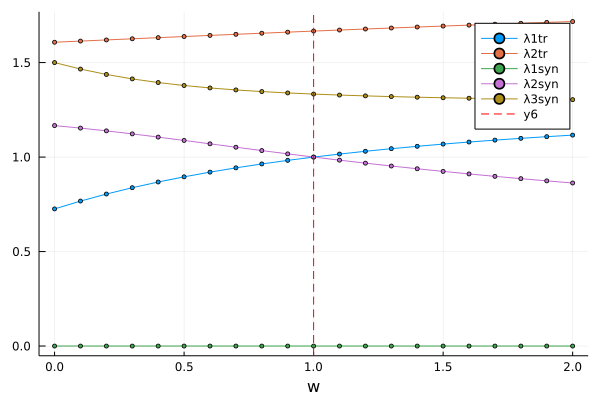

In [12]:
function sweepweight(w, W, M)
    λB = Vector{Vector{Float64}}(undef, length(w))
    λD = Vector{Vector{Float64}}(undef, length(w))
    for (i, wi) in enumerate(w)
        W[2, 5] = W[5, 2] =  -wi
        W[2, 2] -= sum(W[2, :])
        W[5, 5] -= sum(W[5, :])
        Ξ = scale(W)
        G = inv(M) * Ξ * M
        B = G[1 : 2, 1 : 2]
        D = G[3 : 5, 3 : 5]
        λB[i] = eigvals(B)
        λD[i] = eigvals(D)
    end
    λB, λD
end

w = collect(0 : 0.1 : 2)
λB, λD = sweepweight(w, W, M)

using Plots
theme(:default)
marker = (:circle, 3)
plot(w,  getindex.(λB, 1), marker=marker,  label="λ1tr")
plot!(w, getindex.(λB, 2), marker=marker,  label="λ2tr")
plot!(w, getindex.(λD, 1), marker=marker,  label="λ1syn")
plot!(w, getindex.(λD, 2), marker=marker,  label="λ2syn")
plot!(w, getindex.(λD, 3), marker=marker,  label="λ3syn")
vline!([1.], color="red", linestyle=:dash)
xlabel!("w")

Note from the figure that as the link between the node 2 and 5 exceeds the critical value $ w_c = 1 $, the eigenvalue
condition $ \lambda_2^{syn} < \lambda_1^{tr} $ is satisfied.

To further verify the results, we will simulate the network. For this purpose we choose the Lorenz system defiend as
$$
f([x, y, z]) = \left\{
\begin{aligned}
  \dot{x} &= \sigma (y - x) \\
  \dot{x} &= x (\rho - z) - y \\
  \dot{x} &= x y - \beta z \\
\end{aligned}
\right.
$$
For $ \sigma = 10, \beta = 8 / 3, \rho = 35 $, the system is chaotic with the largest lyapunov exponent $
\Lambda_{max} ≈ 0.94 $. To verifyt this numerically, let us calculate the lyapunov exponennts of Lorenz system.

In [13]:
using LyapunovExponents
ds = Lorenz(σ = 10, β = 8 / 3, ρ = 35)
nsteps = Int(3e4)   # Number of steps to calculate Lyapunov exponents
ntrsteps=Int(1e4)   # Number of steps transient steps before calcuting Lyapunov exponents
dt = 0.01           # Integration step size
lyaplorenz = lyapunovs(ds, nsteps = Int(3e4), ntrsteps=Int(1e4), dt=0.01)

3-element Vector{Float64}:
   0.9116666572341631
   0.14660017060997962
 -14.438007879773243

The nodes in the network is connected through their $x$ states. Thus, the innner connection matrix $ P $ is

In [14]:
P = [
    1 0 0;
    0 0 0;
    0 0 0
]

3×3 Matrix{Int64}:
 1  0  0
 0  0  0
 0  0  0

Let us denote $\eta = \epsilon \lambda $ and plot the master stability fucntion of the network.

[ Info: The critical value of η: 10.0


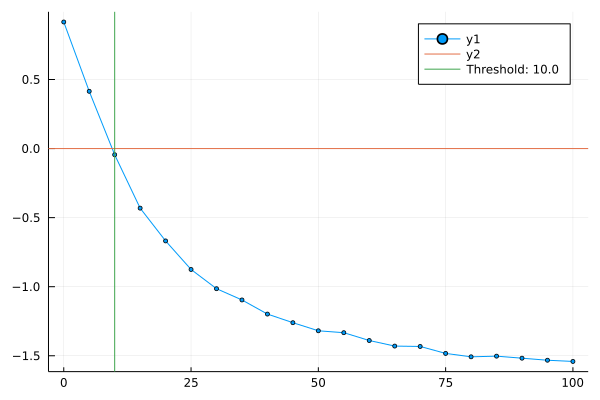

In [15]:
η = range(0, 100, length=21)
Ψ(ηi) = msf(ds, ηi, P)
Λ = Ψ.(η)
plot(η, Λ, marker=(:circle, 3))
hline!([0])
threshold = η[findfirst(Λ .< 0)]
@info "The critical value of η: $threshold"
vline!([threshold], label="Threshold: $threshold")

Note from the plot of the MSF that the critical value $\eta^\star$ after which the the mode changes from instability
to stability is $\eta^\star \approx 10 $. Thus, to make the transverse mode $ \lambda_1^{tr} $, it is necessary that
the coupling strength $ \epsilon $ should be larger than $ \epsilon_1 = \eta^\star / \lambda_1^{tr}$. In the mean time
to avoid full syncronization, we should also keep the coupling strength $ \epsilon $ smaller than $ \epsilon_2 =
\eta^\star / \lambda_2^{syn} $. Hence, the region for $ \epsilon $ is $ [\epsilon_1, \epsilon_2]$. For example, if we
choose the coupling strength between the nodes 2 and 5 as $ w_i = 1.5 $, we can find the interval for $ \epsilon =
 [\epsilon_1, \epsilon_2] = [0.35, 10.82] $

In [16]:
W = collect(laplacian_matrix(graph)) .|> float
wi = 1.5
W[2, 5] = W[5, 2] =  -wi
W[2, 2] -= sum(W[2, :])
W[5, 5] -= sum(W[5, :])
Ξ = scale(W)
G = inv(M) * Ξ * M
B = G[1 : 2, 1 : 2]
D = G[3 : 5, 3 : 5]
λB = eigvals(B)
λD = eigvals(D)
λ1tr = λB[1]
λ2syn = λD[2]
ϵ1 = threshold / λ1tr
ϵ2 = threshold / λ2syn

10.820657406249492

Let us simulate the system in the nodes by for $ \epsilon = 9.6 $.

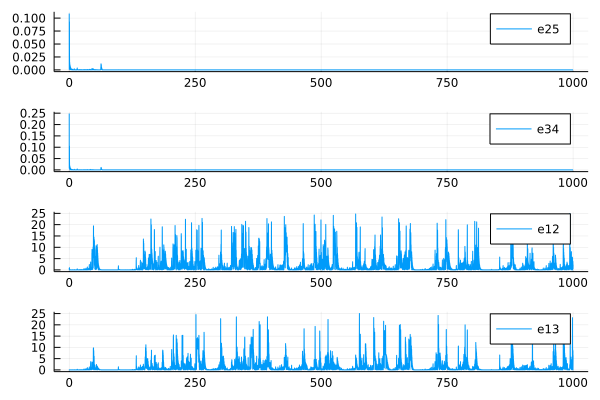

In [17]:
ϵ = 9.6
nodes = [Lorenz(σ = 10, β = 8 / 3, ρ=35) for i in 1 : n]
net = Network(nodes, -ϵ * Ξ, P)
sol = solvenet(net, (0., 1000.))
t, x = sol.t, sol.u

d = dimension(nodes[1])
getwave(x, i) = getindex.(x, (i - 1) * d + 1)

plt = plot(layout = (4, 1))
plot!(t, abs.(getwave(x, 2) -  getwave(x, 5)), label="e25", subplot=1)
plot!(t, abs.(getwave(x, 3) -  getwave(x, 4)), label="e34", subplot=2)
plot!(t, abs.(getwave(x, 1) -  getwave(x, 2)), label="e12", subplot=3)
plot!(t, abs.(getwave(x, 1) -  getwave(x, 3)), label="e13", subplot=4)
plt

Note that the as time evolves nodes 2 and 5 synchronize, and the nodes 3 and 4 synchronize to each other. So we have
the cluster pattern $(a, b, c, c, b)$ where each letter corresponds to a cluster. To we have three clusters, $ G_a =
[1], G_b = [2, 5], G_c = [3, 4]$ .

#### References
* Fu, C., Deng, Z., Huang, L., & Wang, X. (2013). Topological control of synchronous patterns in systems of networked chaotic oscillators. Physical Review E - Statistical, Nonlinear, and Soft Matter Physics, 87(3), 032909. https://doi.org/10.1103/PhysRevE.87.032909

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*